In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/cleaned (2).csv')


In [5]:
data.head()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
0,7,131,4,36692,Female,Home Audio,Philips,2000,6,5,6360,31800
1,19,231,5,36891,Female,Camera,Canon,2000,12,10,9955,99550
2,14,233,5,36893,Female,Camera,Kodak,2001,1,9,7639,68751
3,14,257,5,36926,Female,Camera,Kodak,2001,2,7,5097,35679
4,14,269,5,36952,Female,Camera,Kodak,2001,3,10,6472,64720


In [6]:
data.tail()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
45161,7828,1157458,5,43341,Female,Headphones,Bose,2018,8,7,5925,41475
45162,8624,1157504,5,43342,Female,Headphones,Pyle,2018,8,7,9717,68019
45163,9513,1157527,5,43344,Male,Headphones,Mpow,2018,9,8,9197,73576
45164,9125,1157555,3,43348,Female,Headphones,EldHus,2018,9,10,8848,88480
45165,9478,1157632,1,43374,Female,Headphones,Etre Jeune,2018,10,7,7717,54019


In [7]:
data.describe()

,item_id,user_id,rating,timestamp,year,month,quantity,unitprice,amount
count,45166.000000,4.516600e+04,45166.000000,45166.000000,45166.000000,45166.000000,45166.000000,45166.000000,45166.000000
mean,3455.669574,4.846225e+05,4.218594,42077.370743,2014.710136,6.387902,7.490878,7491.027587,56118.889032
std,2485.219357,3.302487e+05,1.221118,816.969504,2.264562,3.598405,1.707673,1441.977833,16924.053525
min,1.000000,2.800000e+01,1.000000,36692.000000,2000.000000,1.000000,5.000000,5000.000000,25000.000000
25%,1518.000000,1.969772e+05,4.000000,41802.000000,2014.000000,3.000000,6.000000,6239.000000,43098.250000
50%,2881.000000,4.410355e+05,5.000000,42219.000000,2015.000000,6.000000,7.000000,7480.000000,54243.000000
75%,5178.000000,7.579805e+05,5.000000,42594.000000,2016.000000,10.000000,9.000000,8735.000000,67760.000000
max,9551.000000,1.157632e+06,5.000000,43374.000000,2018.000000,12.000000,10.000000,10000.000000,100000.000000


In [8]:
data.shape

(45166, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45166 entries, 0 to 45165
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    45166 non-null  int64 
 1   user_id    45166 non-null  int64 
 2   rating     45166 non-null  int64 
 3   timestamp  45166 non-null  int64 
 4   gender     45166 non-null  object
 5   category   45166 non-null  object
 6   brand      45166 non-null  object
 7   year       45166 non-null  int64 
 8   month      45166 non-null  int64 
 9   quantity   45166 non-null  int64 
 10  unitprice  45166 non-null  int64 
 11  amount     45166 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 4.1+ MB


In [ ]:
data.nunique()


In [ ]:
data.isnull().sum()


In [ ]:
#What are the top-selling product categories?
category_counts = data['category'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("category")
plt.ylabel("Number of Sales")
plt.title("Number of Sales per category")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



In [11]:
#How have sales trends changed over the years?
data['date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str))

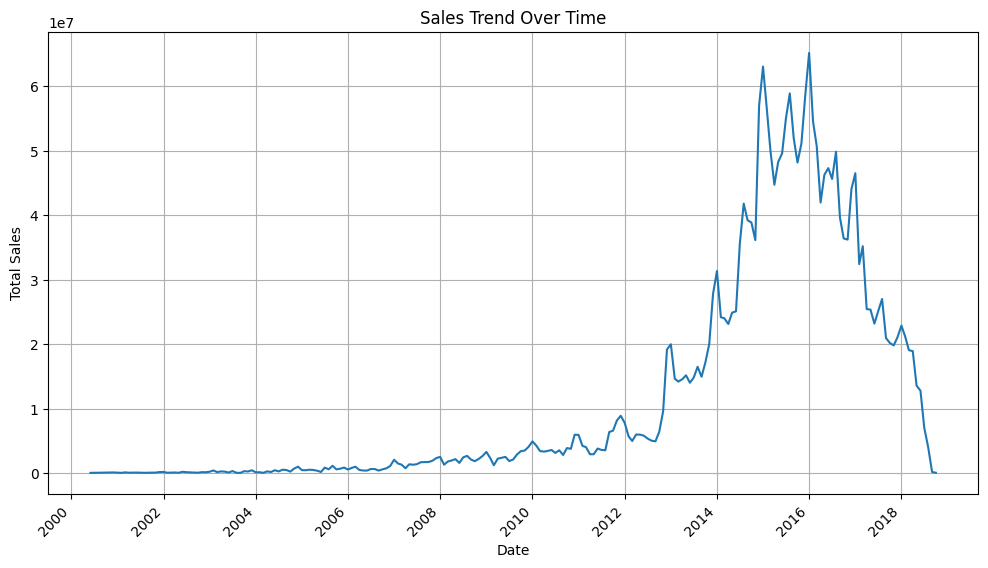

In [12]:
monthly_sales = data.groupby(['year', 'month'])['amount'].sum().reset_index()
# Add 'date' column to monthly_sales DataFrame
monthly_sales['date'] = pd.to_datetime(monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str))
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='amount', data=monthly_sales) # Changed y to 'amount' to match the DataFrame column
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

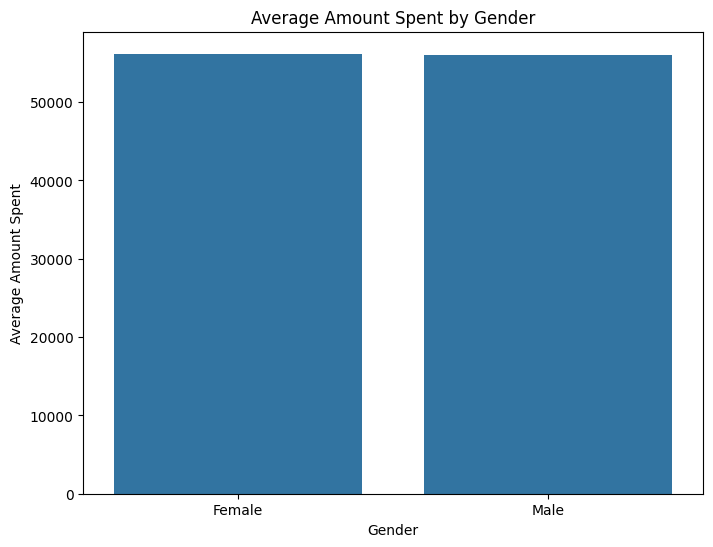

In [13]:
#Do male and female customers have different purchasing behaviors?
gender_spending = data.groupby('gender')['amount'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='amount', data=gender_spending)
plt.xlabel("Gender")
plt.ylabel("Average Amount Spent")
plt.title("Average Amount Spent by Gender")
plt.show()

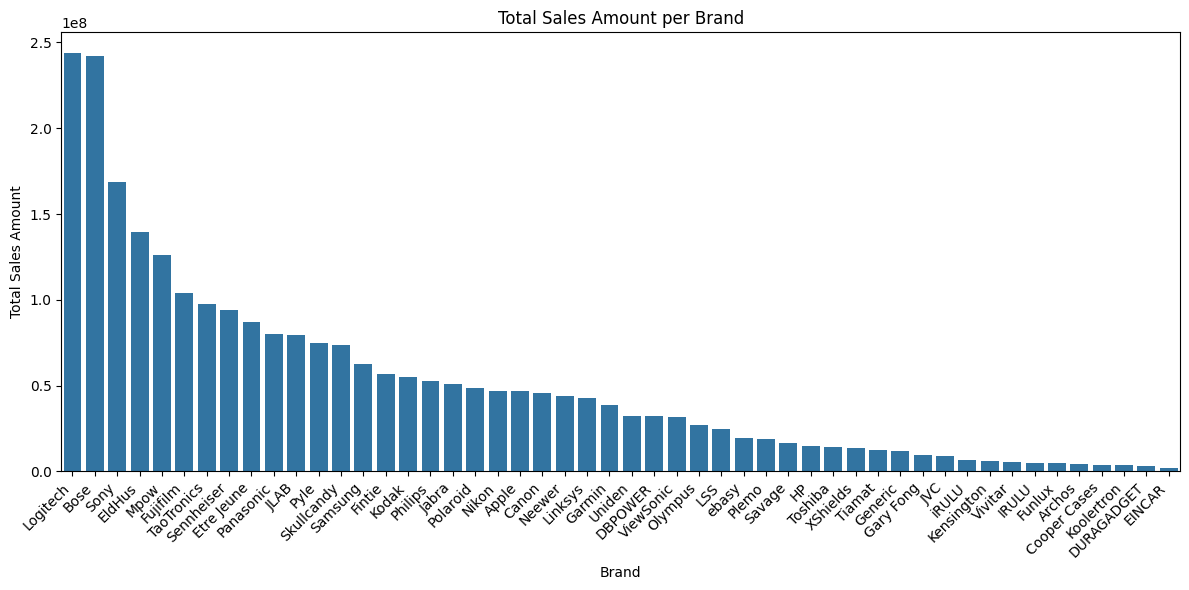

In [14]:
#What are the most popular brands based on sales?
brand_sales = data.groupby('brand')['amount'].sum().reset_index()

# Sort by total sales in descending order
brand_sales = brand_sales.sort_values(by='amount', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.barplot(x='brand', y='amount', data=brand_sales)
plt.xlabel("Brand")
plt.ylabel("Total Sales Amount")
plt.title("Total Sales Amount per Brand")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

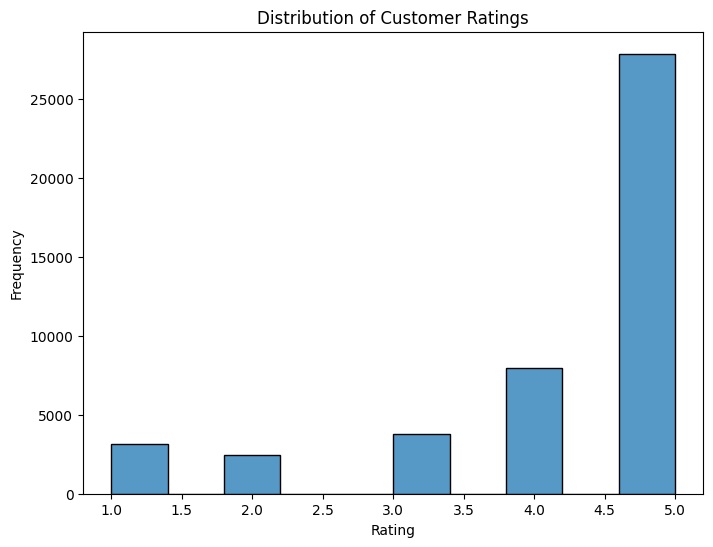

In [15]:
#What is the distribution of customer ratings?
plt.figure(figsize=(8, 6))
sns.histplot(data['rating'], bins=10, kde=False)  # kde=False to remove the density curve
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Customer Ratings")
plt.show()
